In [1]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_validate
from sklearn.metrics import make_scorer, mean_absolute_error, r2_score
from sklearn.linear_model import Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



In [2]:
df = pd.read_csv('Dataset.csv')
df.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min)
0,0xcdcd,DEHRES17DEL01,36.0,4.2,30.327968,78.046106,30.397968,78.116106,12-02-2022,21:55,22:10,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46
1,0xd987,KOCRES16DEL01,21.0,4.7,10.003064,76.307589,10.043064,76.347589,13-02-2022,14:55,15:05,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23
2,0x2784,PUNERES13DEL03,23.0,4.7,18.562450,73.916619,18.652450,74.006619,04-03-2022,17:30,17:40,Sandstorms,Medium,1,Drinks,scooter,1.0,No,Metropolitian,21
3,0xc8b6,LUDHRES15DEL02,34.0,4.3,30.899584,75.809346,30.919584,75.829346,13-02-2022,09:20,09:30,Sandstorms,Low,0,Buffet,motorcycle,0.0,No,Metropolitian,20
4,0xdb64,KNPRES14DEL02,24.0,4.7,26.463504,80.372929,26.593504,80.502929,14-02-2022,19:50,20:05,Fog,Jam,1,Snack,scooter,1.0,No,Metropolitian,41


In [3]:
df.shape

(45584, 20)

In [4]:
df.columns

Index(['ID', 'Delivery_person_ID', 'Delivery_person_Age',
       'Delivery_person_Ratings', 'Restaurant_latitude',
       'Restaurant_longitude', 'Delivery_location_latitude',
       'Delivery_location_longitude', 'Order_Date', 'Time_Orderd',
       'Time_Order_picked', 'Weather_conditions', 'Road_traffic_density',
       'Vehicle_condition', 'Type_of_order', 'Type_of_vehicle',
       'multiple_deliveries', 'Festival', 'City', 'Time_taken (min)'],
      dtype='object')

In [5]:
# Lowering all the columns so there is no typo while mentioning column names
df.columns = [col.lower() for col in df.columns]

In [6]:
# Rename the column
df.rename(columns = {"time_taken (min)" : "time_taken_min"},inplace = True)

In [7]:
# Information about Data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45584 entries, 0 to 45583
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           45584 non-null  object 
 1   delivery_person_id           45584 non-null  object 
 2   delivery_person_age          43730 non-null  float64
 3   delivery_person_ratings      43676 non-null  float64
 4   restaurant_latitude          45584 non-null  float64
 5   restaurant_longitude         45584 non-null  float64
 6   delivery_location_latitude   45584 non-null  float64
 7   delivery_location_longitude  45584 non-null  float64
 8   order_date                   45584 non-null  object 
 9   time_orderd                  43853 non-null  object 
 10  time_order_picked            45584 non-null  object 
 11  weather_conditions           44968 non-null  object 
 12  road_traffic_density         44983 non-null  object 
 13  vehicle_conditio

In [8]:
# Display the data type of each column in a DataFrame
df.dtypes


id                              object
delivery_person_id              object
delivery_person_age            float64
delivery_person_ratings        float64
restaurant_latitude            float64
restaurant_longitude           float64
delivery_location_latitude     float64
delivery_location_longitude    float64
order_date                      object
time_orderd                     object
time_order_picked               object
weather_conditions              object
road_traffic_density            object
vehicle_condition                int64
type_of_order                   object
type_of_vehicle                 object
multiple_deliveries            float64
festival                        object
city                            object
time_taken_min                   int64
dtype: object

In [9]:
# Change data types of columns order_date to datetime 
df['order_date'] = pd.to_datetime(df["order_date"],format="%d-%m-%Y")

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45584 entries, 0 to 45583
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   id                           45584 non-null  object        
 1   delivery_person_id           45584 non-null  object        
 2   delivery_person_age          43730 non-null  float64       
 3   delivery_person_ratings      43676 non-null  float64       
 4   restaurant_latitude          45584 non-null  float64       
 5   restaurant_longitude         45584 non-null  float64       
 6   delivery_location_latitude   45584 non-null  float64       
 7   delivery_location_longitude  45584 non-null  float64       
 8   order_date                   45584 non-null  datetime64[ns]
 9   time_orderd                  43853 non-null  object        
 10  time_order_picked            45584 non-null  object        
 11  weather_conditions           44968 non-nu

In [11]:
# Retrieving statistics of the numerical columns in a DataFrame.
df.describe(include = np.number).T

,count,mean,std,min,25%,50%,75%,max
delivery_person_age,43730.0,29.566911,5.815064,15.000000,25.000000,30.000000,35.000000,50.000000
delivery_person_ratings,43676.0,4.633774,0.334744,1.000000,4.500000,4.700000,4.900000,6.000000
restaurant_latitude,45584.0,17.017948,8.185674,-30.905562,12.933284,18.551440,22.728163,30.914057
restaurant_longitude,45584.0,70.229684,22.885575,-88.366217,73.170000,75.897963,78.044095,88.433452
delivery_location_latitude,45584.0,17.465480,7.335562,0.010000,12.988453,18.633934,22.785049,31.054057
delivery_location_longitude,45584.0,70.844161,21.120578,0.010000,73.280000,76.002574,78.107044,88.563452
vehicle_condition,45584.0,1.023385,0.839055,0.000000,0.000000,1.000000,2.000000,3.000000
multiple_deliveries,44591.0,0.744635,0.572510,0.000000,0.000000,1.000000,1.000000,3.000000
time_taken_min,45584.0,26.293963,9.384298,10.000000,19.000000,26.000000,32.000000,54.000000


In [12]:
df.describe(include = "object").T

,count,unique,top,freq
id,45584,45584,0x2bed,1
delivery_person_id,45584,1320,PUNERES01DEL01,67
time_orderd,43853,176,21:55,461
time_order_picked,45584,193,21:30,495
weather_conditions,44968,6,Fog,7653
road_traffic_density,44983,4,Low,15476
type_of_order,45584,4,Snack,11530
type_of_vehicle,45584,4,motorcycle,26429
festival,45356,2,No,44460
city,44384,3,Metropolitian,34087


In [13]:
# Checking null values
(df.isnull().sum()/len(df)) * 100

id                             0.000000
delivery_person_id             0.000000
delivery_person_age            4.067217
delivery_person_ratings        4.185679
restaurant_latitude            0.000000
restaurant_longitude           0.000000
delivery_location_latitude     0.000000
delivery_location_longitude    0.000000
order_date                     0.000000
time_orderd                    3.797385
time_order_picked              0.000000
weather_conditions             1.351351
road_traffic_density           1.318445
vehicle_condition              0.000000
type_of_order                  0.000000
type_of_vehicle                0.000000
multiple_deliveries            2.178396
festival                       0.500176
city                           2.632503
time_taken_min                 0.000000
dtype: float64

In [14]:
# Drop the missing values
df.dropna(inplace = True)

In [15]:
# Checking null values
(df.isnull().sum()/len(df)) * 100

id                             0.0
delivery_person_id             0.0
delivery_person_age            0.0
delivery_person_ratings        0.0
restaurant_latitude            0.0
restaurant_longitude           0.0
delivery_location_latitude     0.0
delivery_location_longitude    0.0
order_date                     0.0
time_orderd                    0.0
time_order_picked              0.0
weather_conditions             0.0
road_traffic_density           0.0
vehicle_condition              0.0
type_of_order                  0.0
type_of_vehicle                0.0
multiple_deliveries            0.0
festival                       0.0
city                           0.0
time_taken_min                 0.0
dtype: float64

In [16]:
# Check for Duplicate values
df.duplicated().sum()

np.int64(0)

In [17]:
df.nunique()

id                             41359
delivery_person_id              1320
delivery_person_age               20
delivery_person_ratings           26
restaurant_latitude              487
restaurant_longitude             389
delivery_location_latitude      4361
delivery_location_longitude     4361
order_date                        44
time_orderd                      176
time_order_picked                193
weather_conditions                 6
road_traffic_density               4
vehicle_condition                  3
type_of_order                      4
type_of_vehicle                    3
multiple_deliveries                4
festival                           2
city                               3
time_taken_min                    45
dtype: int64

In [18]:
import numpy as np

# Fix sign errors (make all coordinates positive)
for col in ["restaurant_latitude", "restaurant_longitude", "delivery_location_latitude", "delivery_location_longitude"]:
    df[col] = df[col].abs()

### Creating new features

In [19]:
# Extractin month from the order date column

df['order_month'] = pd.DatetimeIndex(df['order_date']).strftime('%b')

In [20]:
df.head()

,id,delivery_person_id,delivery_person_age,delivery_person_ratings,restaurant_latitude,restaurant_longitude,delivery_location_latitude,delivery_location_longitude,order_date,time_orderd,...,weather_conditions,road_traffic_density,vehicle_condition,type_of_order,type_of_vehicle,multiple_deliveries,festival,city,time_taken_min,order_month
0,0xcdcd,DEHRES17DEL01,36.0,4.2,30.327968,78.046106,30.397968,78.116106,2022-02-12,21:55,...,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46,Feb
1,0xd987,KOCRES16DEL01,21.0,4.7,10.003064,76.307589,10.043064,76.347589,2022-02-13,14:55,...,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23,Feb
2,0x2784,PUNERES13DEL03,23.0,4.7,18.562450,73.916619,18.652450,74.006619,2022-03-04,17:30,...,Sandstorms,Medium,1,Drinks,scooter,1.0,No,Metropolitian,21,Mar
3,0xc8b6,LUDHRES15DEL02,34.0,4.3,30.899584,75.809346,30.919584,75.829346,2022-02-13,09:20,...,Sandstorms,Low,0,Buffet,motorcycle,0.0,No,Metropolitian,20,Feb
4,0xdb64,KNPRES14DEL02,24.0,4.7,26.463504,80.372929,26.593504,80.502929,2022-02-14,19:50,...,Fog,Jam,1,Snack,scooter,1.0,No,Metropolitian,41,Feb


In [21]:
#Creating new feature for age bins for further analysis
age = [20,25,30,35,40]
label = ["20-24","25-29","30-34","35+"]
df["age_bins"] = pd.cut(df["delivery_person_age"],bins = age,labels=label)

In [22]:
# Creating peak hour indicating whether an order was placed during peak hours

df['time_orderd'] = pd.to_datetime(df['time_orderd'], format='%H:%M', errors='coerce')

def is_peak_hour(df):
    hour = pd.to_datetime(df['time_orderd']).hour
    return 1 if (11 <= hour < 14) or (17 <= hour < 21) else 0

df['peak_hours'] = df.apply(is_peak_hour, axis=1)

In [23]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
delivery_person_age,41359.0,29.609783,20.0,25.0,30.0,35.0,39.0,5.764045
delivery_person_ratings,41359.0,4.633202,2.5,4.5,4.7,4.9,5.0,0.315887
restaurant_latitude,41359.0,17.408884,0.0,12.934179,18.56245,22.732225,30.914057,7.336161
restaurant_longitude,41359.0,70.775773,0.0,73.170283,75.898497,78.045359,88.433452,21.124028
delivery_location_latitude,41359.0,17.472763,0.01,12.989096,18.636947,22.785536,31.054057,7.337562
delivery_location_longitude,41359.0,70.839652,0.01,73.278436,76.002471,78.107079,88.563452,21.12423
order_date,41359,2022-03-13 16:00:34.120747776,2022-02-11 00:00:00,2022-03-04 00:00:00,2022-03-15 00:00:00,2022-03-27 00:00:00,2022-04-06 00:00:00,NaN
time_orderd,37525,1900-01-01 18:07:49.766822144,1900-01-01 08:10:00,1900-01-01 15:55:00,1900-01-01 19:20:00,1900-01-01 21:35:00,1900-01-01 23:55:00,NaN
vehicle_condition,41359.0,0.995914,0.0,0.0,1.0,2.0,2.0,0.81798
multiple_deliveries,41359.0,0.748108,0.0,0.0,1.0,1.0,3.0,0.572974


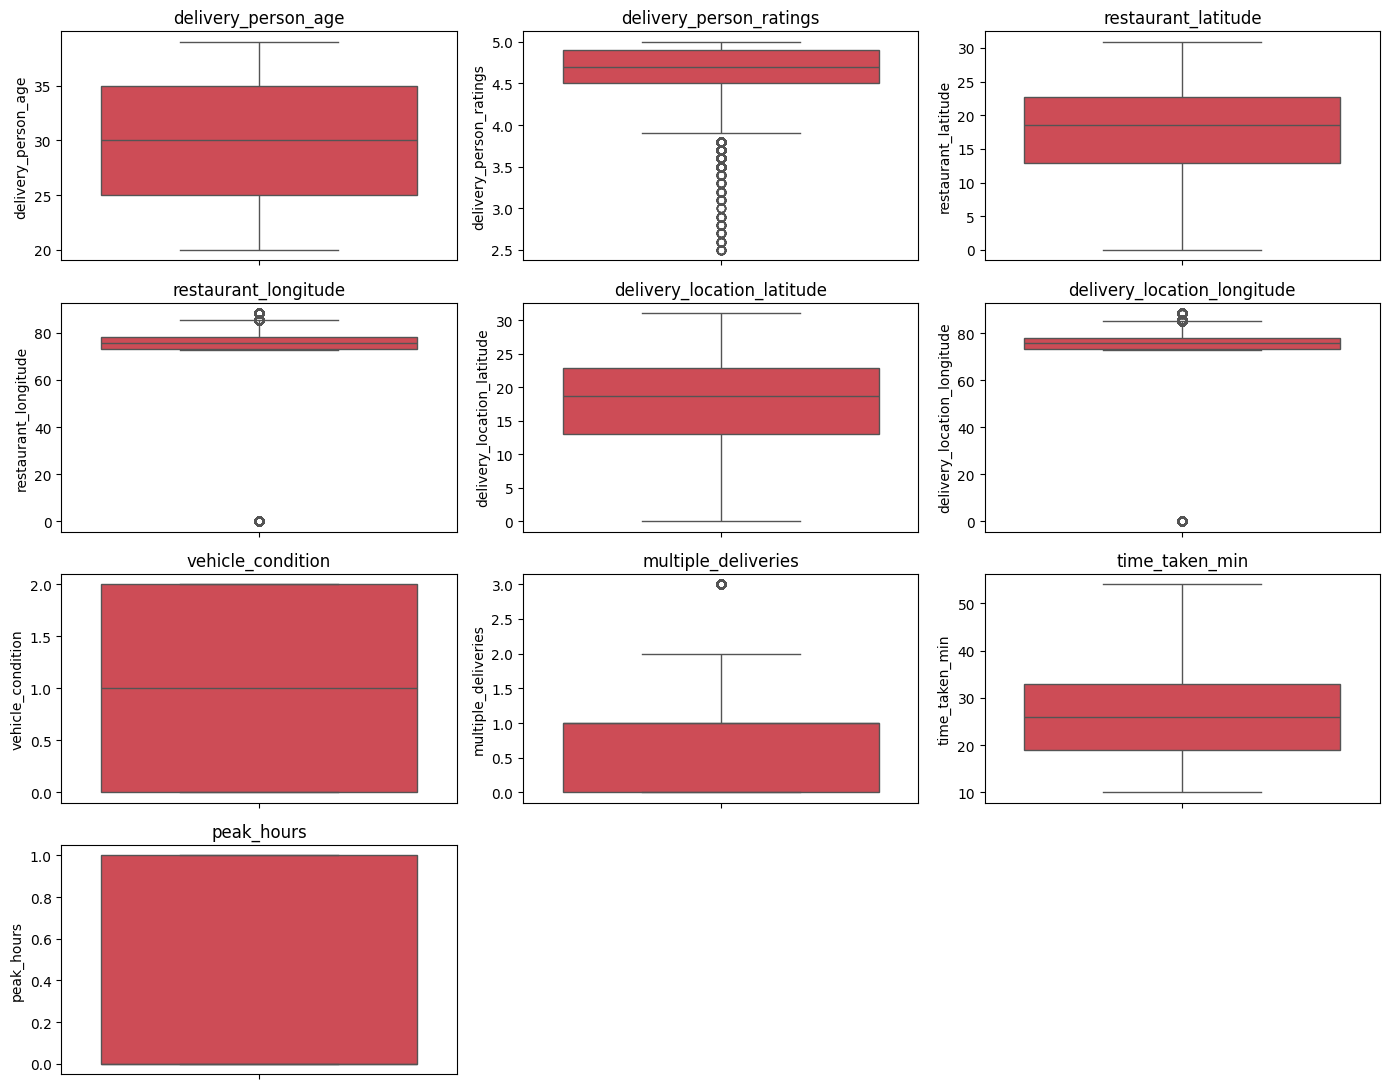

In [24]:
numeric_columns = df.select_dtypes(include=["number"])

plt.figure(figsize=(14,11))
for i,col in enumerate (numeric_columns.columns):
  plt.subplot(4,3,i+1)
  sns.boxplot(df[col],color="#E23744")
  plt.title(col)
plt.tight_layout()
plt.show()


In [25]:
# Select only numerical columns
numeric_columns = df.select_dtypes(include=["number"])

def identify_outliers(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data < lower_bound) | (data > upper_bound)]

outlier_counts = {}  # Dictionary to store outlier counts for each column

for col in numeric_columns.columns:
    outliers = identify_outliers(numeric_columns[col])
    outlier_counts[col] = len(outliers)

# Print the count of outliers for each numerical column
for col, count in outlier_counts.items():
    print(f"Count of outliers present in {col}: {count}")
    print(f"% Count of outliers present in {col}: {count/ len(df)*100}\n")


Count of outliers present in delivery_person_age: 0
% Count of outliers present in delivery_person_age: 0.0

Count of outliers present in delivery_person_ratings: 1099
% Count of outliers present in delivery_person_ratings: 2.657220919267874

Count of outliers present in restaurant_latitude: 0
% Count of outliers present in restaurant_latitude: 0.0

Count of outliers present in restaurant_longitude: 4097
% Count of outliers present in restaurant_longitude: 9.905945501583693

Count of outliers present in delivery_location_latitude: 0
% Count of outliers present in delivery_location_latitude: 0.0

Count of outliers present in delivery_location_longitude: 5900
% Count of outliers present in delivery_location_longitude: 14.265335235378032

Count of outliers present in vehicle_condition: 0
% Count of outliers present in vehicle_condition: 0.0

Count of outliers present in multiple_deliveries: 337
% Count of outliers present in multiple_deliveries: 0.8148166058173553

Count of outliers prese

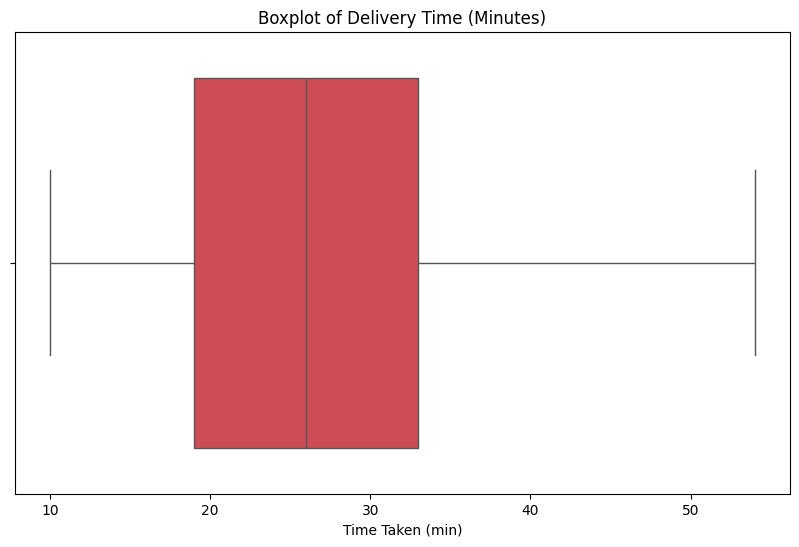

In [26]:
# Boxplot for Delivery Time
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['time_taken_min'],color="#E23744")
plt.title('Boxplot of Delivery Time (Minutes)')
plt.xlabel('Time Taken (min)')
plt.show()


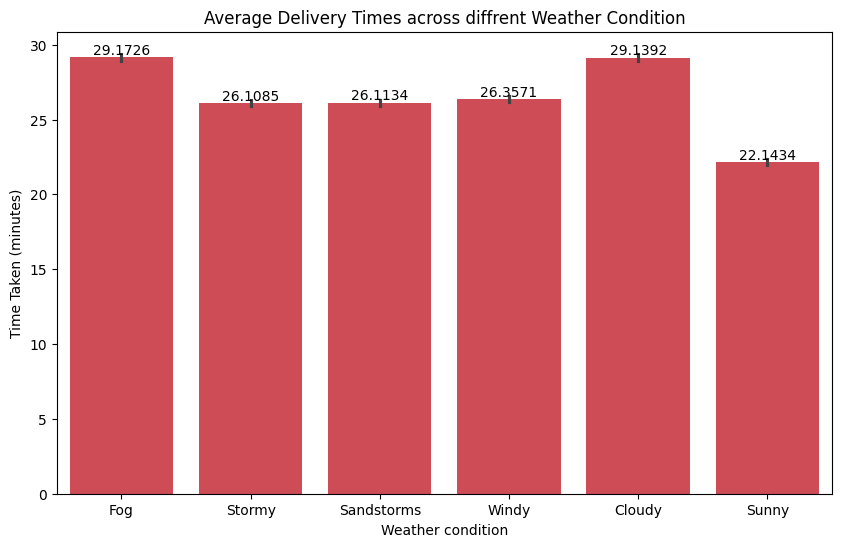

In [27]:
#Bar plot comparing average delivery times across different weather condition.

plt.figure(figsize =(10,6))
ax = sns.barplot(x="weather_conditions", y="time_taken_min", data=df,color="#E23744")

# Add bar labels
for container in ax.containers:
    ax.bar_label(container)

# Show the plot
plt.title("Average Delivery Times across diffrent Weather Condition")
plt.xlabel("Weather condition")
plt.ylabel("Time Taken (minutes)")
plt.show()


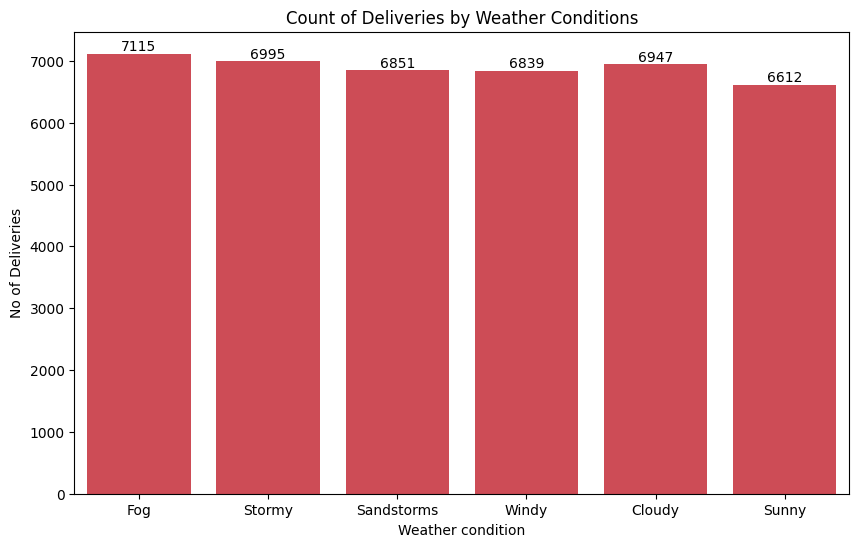

In [28]:
#Bar plot comparing Count of Deliveries by Weather Conditions.

plt.figure(figsize=(10, 6))
ax = sns.countplot(x = "weather_conditions", data=df,color="#E23744")

# Add bar labels
for container in ax.containers:
    ax.bar_label(container)

# Show the plot
plt.title("Count of Deliveries by Weather Conditions")
plt.xlabel("Weather condition")
plt.ylabel("No of Deliveries")
plt.show()


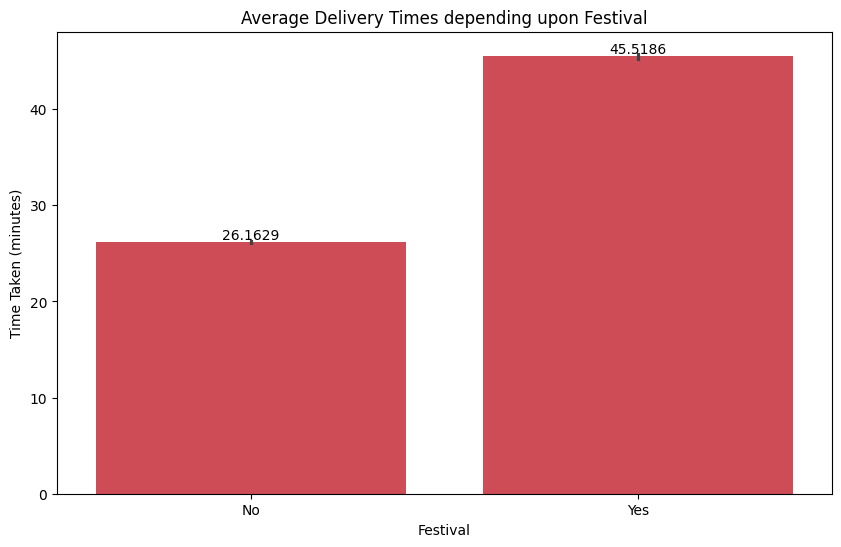

In [29]:
#Bar plot comparing average delivery times depending upon Festival.

plt.figure(figsize =(10,6))
ax = sns.barplot(x="festival", y="time_taken_min", data=df,color="#E23744")

# Add bar labels
for container in ax.containers:
    ax.bar_label(container)

# Show the plot
plt.title("Average Delivery Times depending upon Festival")
plt.xlabel("Festival")
plt.ylabel("Time Taken (minutes)")
plt.show()


C:\Users\User\AppData\Local\Temp\ipykernel_6324\1466526782.py:4: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:#E23744'` for the same effect.

  ax = sns.barplot(x="type_of_vehicle", y="time_taken_min",hue="peak_hours", data=df,color="#E23744")


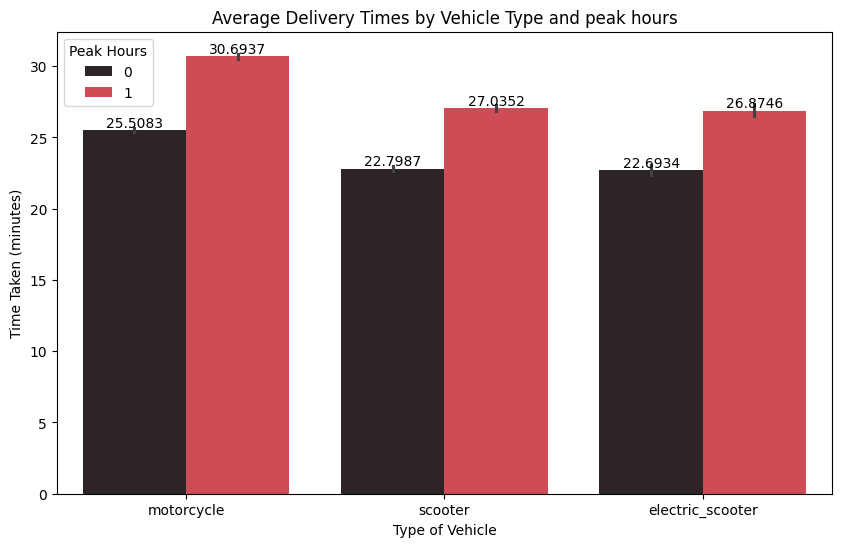

In [30]:
#Bar plot comparing average delivery times across different vehicle types and Peak Hours.

plt.figure(figsize =(10,6))
ax = sns.barplot(x="type_of_vehicle", y="time_taken_min",hue="peak_hours", data=df,color="#E23744")

# Add bar labels
for container in ax.containers:
    ax.bar_label(container)

# Show the plot
plt.title("Average Delivery Times by Vehicle Type and peak hours")
plt.xlabel("Type of Vehicle")
plt.ylabel("Time Taken (minutes)")
plt.legend(title = "Peak Hours")
plt.show()


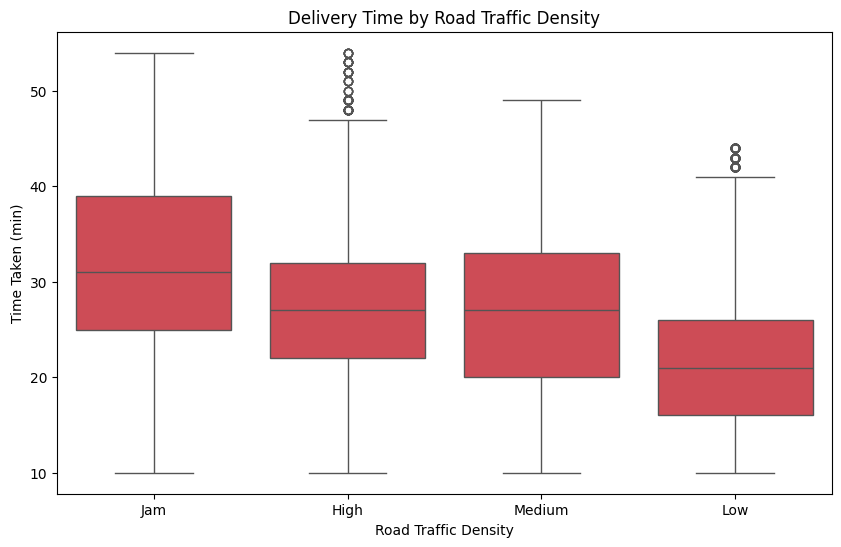

In [31]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='road_traffic_density', y='time_taken_min', data=df,color="#E23744")
plt.title('Delivery Time by Road Traffic Density')
plt.xlabel('Road Traffic Density')
plt.ylabel('Time Taken (min)')
plt.show()


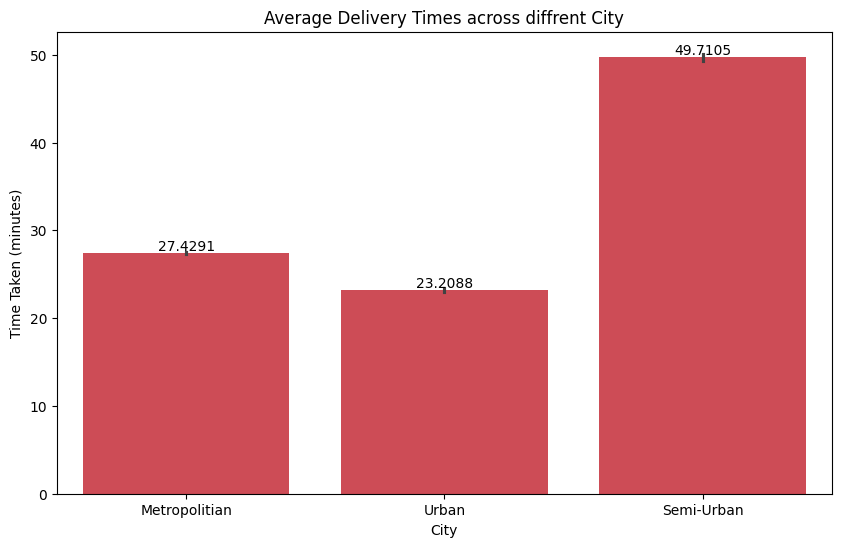

In [32]:
#Bar plot comparing average delivery times across different City.

plt.figure(figsize =(10,6))
ax = sns.barplot(x="city", y="time_taken_min", data=df,color="#E23744")

# Add bar labels
for container in ax.containers:
    ax.bar_label(container)

# Show the plot
plt.title("Average Delivery Times across diffrent City")
plt.xlabel("City")
plt.ylabel("Time Taken (minutes)")
plt.show()


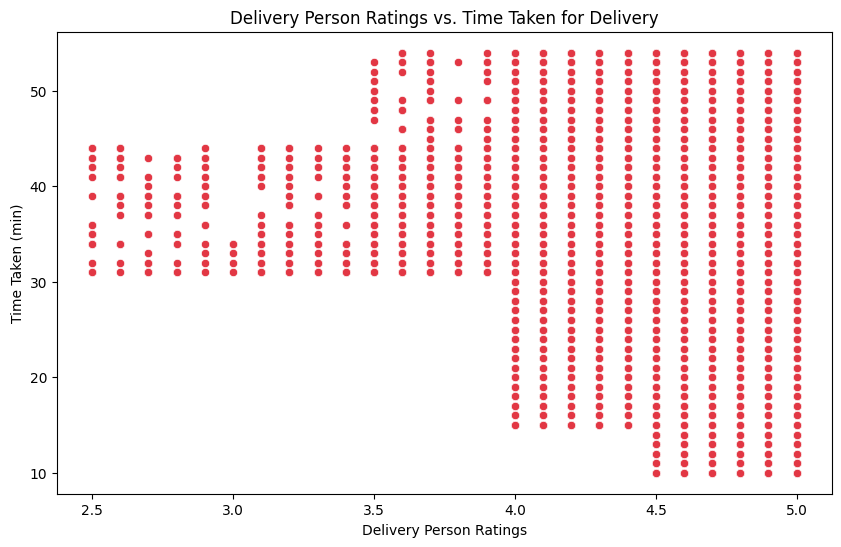

In [33]:
#Scatter plot comparing average delivery times VS Delivery Person Rating.

plt.figure(figsize=(10, 6))
sns.scatterplot(x="delivery_person_ratings", y="time_taken_min", data=df,color="#E23744")
plt.title("Delivery Person Ratings vs. Time Taken for Delivery")
plt.xlabel("Delivery Person Ratings")
plt.ylabel("Time Taken (min)")
plt.show()


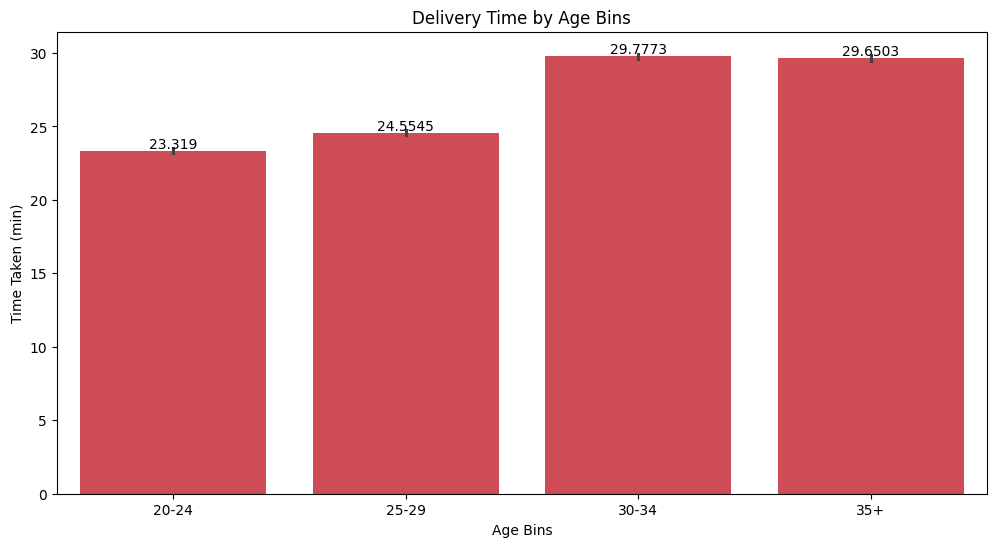

In [34]:
plt.figure(figsize=(12, 6))
ax = sns.barplot(x="age_bins", y="time_taken_min",  data=df,color="#E23744")
for container in ax.containers:
    ax.bar_label(container)
plt.title("Delivery Time by Age Bins")
plt.xlabel("Age Bins")
plt.ylabel("Time Taken (min)")
plt.show()


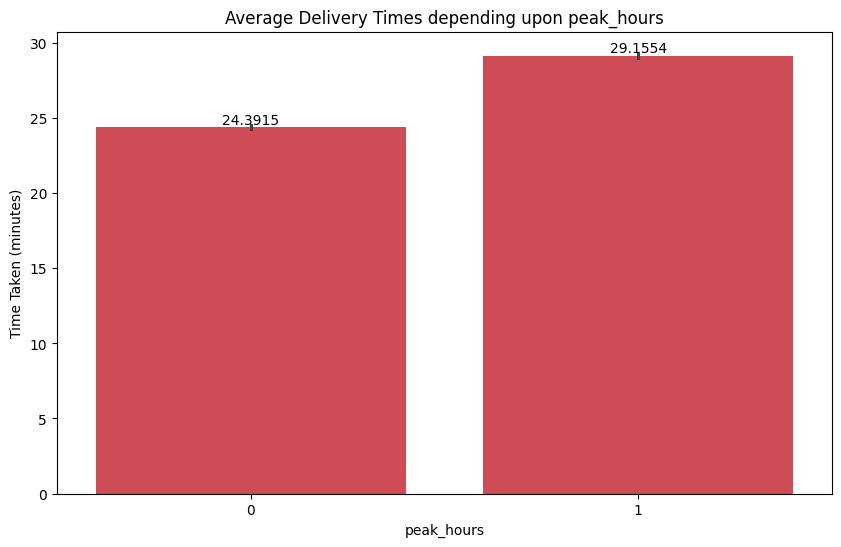

In [35]:

# average delivery times differ between peak hours and off-peak hours
plt.figure(figsize =(10,6))
ax = sns.barplot(x="peak_hours", y="time_taken_min", data=df,color = "#E23744")

# Add bar labels
for container in ax.containers:
    ax.bar_label(container)

# Show the plot
plt.title("Average Delivery Times depending upon peak_hours")
plt.xlabel("peak_hours")
plt.ylabel("Time Taken (minutes)")
plt.show()


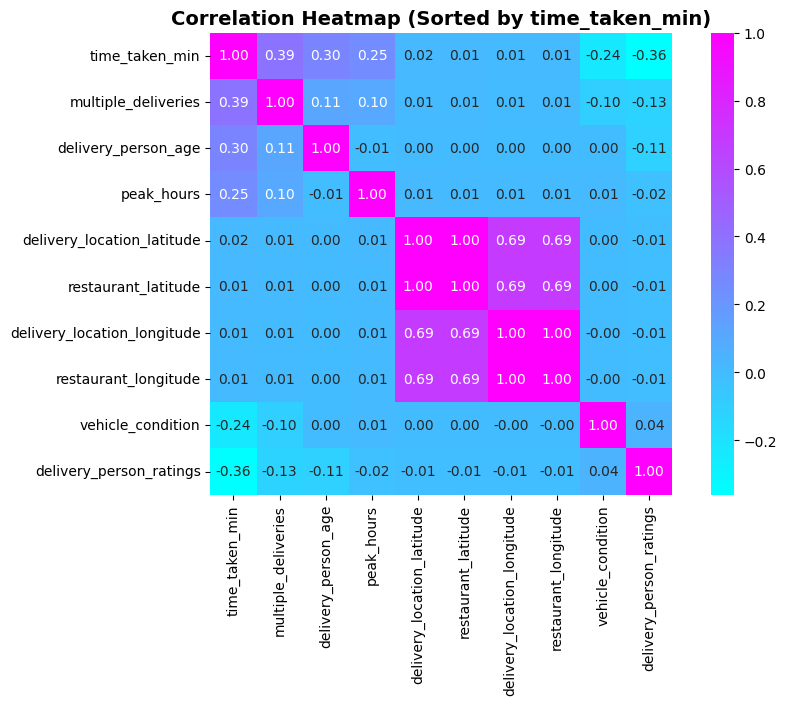

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Compute correlation matrix
corr = numeric_columns.corr()

# Select correlation with the target variable (time_taken_min)
target_corr = corr["time_taken_min"].sort_values(ascending=False)

# Reorder columns by correlation strength (target on top)
sorted_cols = target_corr.index

# Create a sorted correlation matrix
sorted_corr = corr.loc[sorted_cols, sorted_cols]

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(sorted_corr, cmap="cool", annot=True, fmt=".2f", square=True, cbar=True)
plt.title("Correlation Heatmap (Sorted by time_taken_min)", fontsize=14, fontweight="bold")
plt.show()


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41359 entries, 0 to 45583
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   id                           41359 non-null  object        
 1   delivery_person_id           41359 non-null  object        
 2   delivery_person_age          41359 non-null  float64       
 3   delivery_person_ratings      41359 non-null  float64       
 4   restaurant_latitude          41359 non-null  float64       
 5   restaurant_longitude         41359 non-null  float64       
 6   delivery_location_latitude   41359 non-null  float64       
 7   delivery_location_longitude  41359 non-null  float64       
 8   order_date                   41359 non-null  datetime64[ns]
 9   time_orderd                  37525 non-null  datetime64[ns]
 10  time_order_picked            41359 non-null  object        
 11  weather_conditions           41359 non-null  o

In [38]:
import numpy as np

# ==========================================================
# 🌍 Function to calculate distance between two GPS coordinates
# ==========================================================
def haversine(lat1, lon1, lat2, lon2):
    """
    Compute the great-circle distance between two points on Earth using
    the Haversine formula.
    
    Parameters:
    -----------
    lat1, lon1 : float or array-like
        Latitude and longitude of the first location (in decimal degrees)
    lat2, lon2 : float or array-like
        Latitude and longitude of the second location (in decimal degrees)
    
    Returns:
    --------
    distance : float or array-like
        Distance between the two points, in kilometers.
    """
    R = 6371  # 🌎 Earth's radius in kilometers
    
    # Convert decimal degrees to radians for trigonometric functions
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    
    # Compute differences between latitudes and longitudes
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    
    # Apply the Haversine formula
    a = (
        np.sin(dlat / 2)**2
        + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2)**2
    )
    distance = 2 * R * np.arcsin(np.sqrt(a))
    return distance

# ==========================================================
# 🧮 Calculate distance for each delivery record
# ==========================================================
df["distance_km"] = haversine(
    df["restaurant_latitude"], df["restaurant_longitude"],
    df["delivery_location_latitude"], df["delivery_location_longitude"]
)

# ==========================================================
# 📊 Summarize computed distances
# ==========================================================
print(df["distance_km"].describe())


count    41359.000000
mean         9.775496
std          5.608272
min          1.465067
25%          4.663545
50%          9.220835
75%         13.682048
max         20.969489
Name: distance_km, dtype: float64


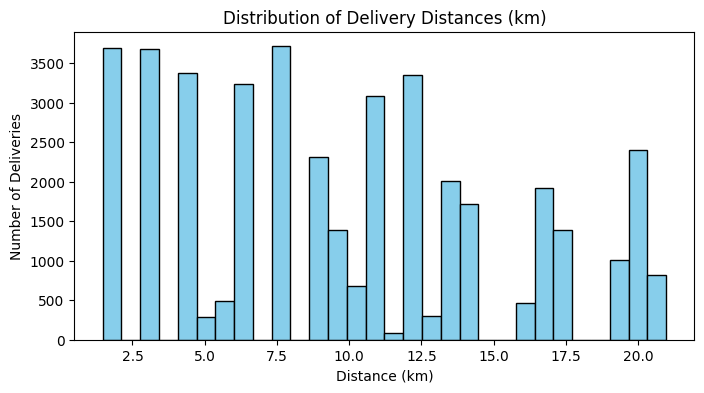

In [39]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 4))
plt.hist(df["distance_km"], bins=30, color='skyblue', edgecolor='black')
plt.title("Distribution of Delivery Distances (km)")
plt.xlabel("Distance (km)")
plt.ylabel("Number of Deliveries")
plt.show()


In [40]:
df.isnull().sum()

id                                0
delivery_person_id                0
delivery_person_age               0
delivery_person_ratings           0
restaurant_latitude               0
restaurant_longitude              0
delivery_location_latitude        0
delivery_location_longitude       0
order_date                        0
time_orderd                    3834
time_order_picked                 0
weather_conditions                0
road_traffic_density              0
vehicle_condition                 0
type_of_order                     0
type_of_vehicle                   0
multiple_deliveries               0
festival                          0
city                              0
time_taken_min                    0
order_month                       0
age_bins                       1998
peak_hours                        0
distance_km                       0
dtype: int64

In [41]:
# ==========================================================
# 🕒 Step 1: Ensure 'order_date' is in proper datetime format
# ==========================================================
df['order_date'] = pd.to_datetime(df['order_date'], errors='coerce')
# Converts 'order_date' from string to datetime.
# 'errors="coerce"' replaces invalid or unparseable dates with NaT (missing).

# ==========================================================
# ⏰ Step 2: Extract only the time part from 'time_order_picked'
# ==========================================================
df['time_order_picked'] = pd.to_datetime(df['time_order_picked'], errors='coerce').dt.time
# Converts the 'time_order_picked' column (which may include full datetime or string)
# into just a Python time object (HH:MM:SS).
# This isolates the time component, discarding any date information.

# ==========================================================
# 📅 Step 3: Combine date and time into a single datetime column
# ==========================================================
df['pickup_datetime'] = pd.to_datetime(
    df['order_date'].dt.strftime('%Y-%m-%d') + ' ' + df['time_order_picked'].astype(str),
    format='%Y-%m-%d %H:%M:%S',
    errors='coerce'
)
# This merges 'order_date' (date) and 'time_order_picked' (time) into one complete timestamp.
# Example:
#   order_date         = 2022-03-10
#   time_order_picked  = 15:30:00
#   → pickup_datetime   = 2022-03-10 15:30:00
#
# 'errors="coerce"' ensures that if any row has an invalid or missing time, it becomes NaT instead of crashing.


C:\Users\User\AppData\Local\Temp\ipykernel_6324\2024408990.py:11: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['time_order_picked'] = pd.to_datetime(df['time_order_picked'], errors='coerce').dt.time


In [42]:
df.isnull().sum()

id                                0
delivery_person_id                0
delivery_person_age               0
delivery_person_ratings           0
restaurant_latitude               0
restaurant_longitude              0
delivery_location_latitude        0
delivery_location_longitude       0
order_date                        0
time_orderd                    3834
time_order_picked              4526
weather_conditions                0
road_traffic_density              0
vehicle_condition                 0
type_of_order                     0
type_of_vehicle                   0
multiple_deliveries               0
festival                          0
city                              0
time_taken_min                    0
order_month                       0
age_bins                       1998
peak_hours                        0
distance_km                       0
pickup_datetime                4526
dtype: int64

In [43]:
# Drop rows with missing pickup time or datetime
df = df.dropna(subset=['time_order_picked', 'pickup_datetime']).reset_index(drop=True)

print(f"✅ Dataset cleaned: {len(df)} rows remaining.")

✅ Dataset cleaned: 36833 rows remaining.


In [44]:
# Ensure both order_date and time_orderd are clean
df['order_date'] = pd.to_datetime(df['order_date'], errors='coerce')
df['time_orderd'] = pd.to_datetime(df['time_orderd'], format='%H:%M', errors='coerce').dt.time

# Combine cleanly into full order datetime
df['order_datetime'] = pd.to_datetime(
    df['order_date'].dt.strftime('%Y-%m-%d') + ' ' + df['time_orderd'].astype(str),
    format='%Y-%m-%d %H:%M:%S',
    errors='coerce'
)


In [45]:
df['order_datetime'].isna().sum()

np.int64(3431)

In [46]:
# Compute pickup delay (in minutes)
df['pickup_delay_min'] = (
    df['pickup_datetime'] - df['order_datetime']
).dt.total_seconds() / 60

# Compute total delivery time
df['total_delivery_time_min'] = df['time_taken_min'] + df['pickup_delay_min']


In [47]:
df[['order_datetime', 'pickup_datetime', 'pickup_delay_min', 'total_delivery_time_min']].isna().sum()

order_datetime             3431
pickup_datetime               0
pickup_delay_min           3431
total_delivery_time_min    3431
dtype: int64

In [48]:
# Extract day of week (0 = Monday, 6 = Sunday)
df['order_dayofweek'] = df['order_date'].dt.dayofweek

# Create weekend flag (Saturday=5, Sunday=6)
df['is_weekend'] = df['order_dayofweek'].apply(lambda x: 1 if x >= 5 else 0)


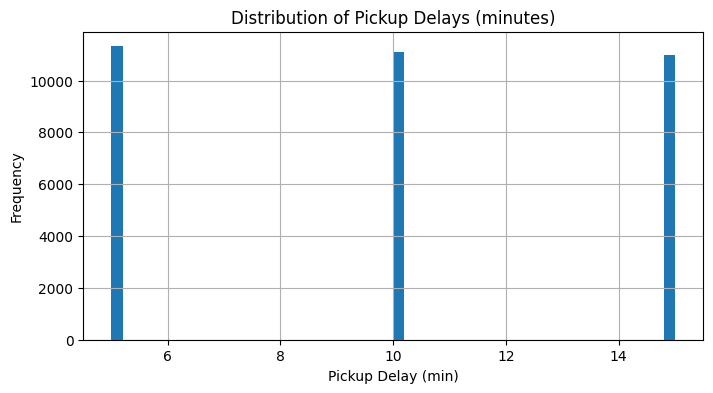

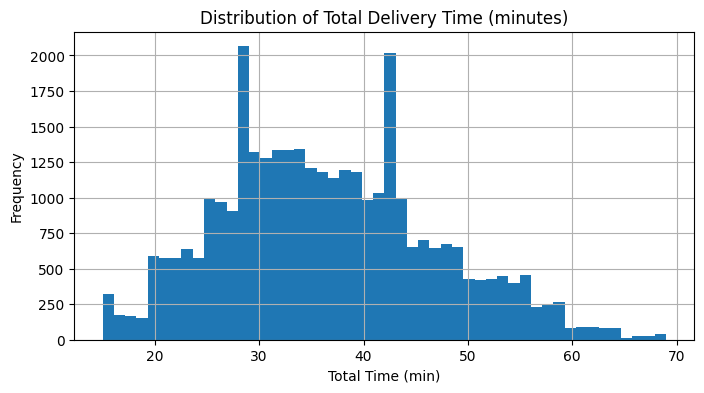

In [49]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,4))
df['pickup_delay_min'].hist(bins=50)
plt.title("Distribution of Pickup Delays (minutes)")
plt.xlabel("Pickup Delay (min)")
plt.ylabel("Frequency")
plt.show()

plt.figure(figsize=(8,4))
df['total_delivery_time_min'].hist(bins=50)
plt.title("Distribution of Total Delivery Time (minutes)")
plt.xlabel("Total Time (min)")
plt.ylabel("Frequency")
plt.show()

In [50]:
df['hour_of_order'] = df['order_datetime'].dt.hour
df['day_of_month'] = df['order_datetime'].dt.day
df['week_of_year'] = (
    df['order_datetime']
      .dt.isocalendar()
      .week
      .fillna(0)          # replace missing with 0
      .astype(int)
)

In [51]:
df['order_hour'] = pd.to_datetime(df['time_orderd'], format='%H:%M:%S', errors='coerce').dt.hour

In [52]:
df['distance_traffic'] = df['distance_km'] * df['peak_hours']
df['rating_vehicle'] = df['delivery_person_ratings'] * df['vehicle_condition']
df['delay_weekend'] = df['peak_hours'] * df['is_weekend']


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36833 entries, 0 to 36832
Data columns (total 37 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   id                           36833 non-null  object        
 1   delivery_person_id           36833 non-null  object        
 2   delivery_person_age          36833 non-null  float64       
 3   delivery_person_ratings      36833 non-null  float64       
 4   restaurant_latitude          36833 non-null  float64       
 5   restaurant_longitude         36833 non-null  float64       
 6   delivery_location_latitude   36833 non-null  float64       
 7   delivery_location_longitude  36833 non-null  float64       
 8   order_date                   36833 non-null  datetime64[ns]
 9   time_orderd                  33402 non-null  object        
 10  time_order_picked            36833 non-null  object        
 11  weather_conditions           36833 non-nu

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import numpy as np

# --------------------------------------------------------
# 1. TARGET
# --------------------------------------------------------
y = df["time_taken_min"]
X = df.drop(columns=["time_taken_min"])

# --------------------------------------------------------
# 2. NUMERIC FEATURES FOR PCA
# --------------------------------------------------------
numeric_features = [
    "delivery_person_age",
    "delivery_person_ratings",
    "restaurant_latitude",
    "restaurant_longitude",
    "delivery_location_latitude",
    "delivery_location_longitude",
    "vehicle_condition",
    "multiple_deliveries",
    "peak_hours",
    "distance_km",
    "pickup_delay_min",
    "total_delivery_time_min",
    "order_dayofweek",
    "hour_of_order",
    "day_of_month",
    "week_of_year",
    "order_hour",
    "distance_traffic",
    "rating_vehicle",
    "delay_weekend"
]

# --------------------------------------------------------
# 3. CATEGORICAL FEATURES (NOT PCA)
# --------------------------------------------------------
categorical_features = [
    "weather_conditions",
    "road_traffic_density",
    "type_of_order",
    "type_of_vehicle",
    "festival",
    "city",
    "order_month",
    "age_bins"
]

# --------------------------------------------------------
# 4. TRAIN/TEST SPLIT
# --------------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# --------------------------------------------------------
# 5. PIPELINES
# --------------------------------------------------------
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy="median")),
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=10))   # <<< choose components
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy="most_frequent")),
    ('onehot', OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(
        n_estimators=300,
        max_depth=15,
        random_state=42
    ))
])

# --------------------------------------------------------
# 6. TRAIN
# --------------------------------------------------------
model.fit(X_train, y_train)

print("Train R2:", model.score(X_train, y_train))
print("Test R2:", model.score(X_test, y_test))

# --------------------------------------------------------
# 7. ANALYZE PCA COMPONENTS
# --------------------------------------------------------
pca = model.named_steps['preprocessor'] \
           .named_transformers_['num'] \
           .named_steps['pca']

print("Explained variance:", pca.explained_variance_ratio_)
print("Cumulative:", np.cumsum(pca.explained_variance_ratio_))


Train R2: 0.9441839998804396
Test R2: 0.8274267870645912
Explained variance: [0.16899747 0.14531851 0.11064576 0.10598316 0.07191192 0.06900781
 0.05442347 0.05204355 0.04409173 0.04352161]
Cumulative: [0.16899747 0.31431598 0.42496174 0.5309449  0.60285682 0.67186462
 0.7262881  0.77833164 0.82242338 0.86594498]


In [56]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
import numpy as np

# Preprocessor is SAME for both models
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler()),
    ("pca", PCA())   # n_components tuned inside GridSearch
])

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features)
    ]
)


In [57]:
rf_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))
])

from sklearn.model_selection import RandomizedSearchCV

rf_params = {
    'preprocessor__num__pca__n_components': [10,12,15,18],
    'regressor__n_estimators': [150, 200, 300, 400],
    'regressor__max_depth': [10, 15, 20, None],
    'regressor__min_samples_split': [2, 5, 10],
    'regressor__min_samples_leaf': [1, 2, 4],
}

random_rf = RandomizedSearchCV(
    rf_model,
    rf_params,
    n_iter=25,   # only test 25 random combinations
    scoring='r2',
    cv=3,
    n_jobs=-1,
    verbose=2,
    random_state=42
)


grid_rf.fit(X_train, y_train)

print("\n===== RANDOM FOREST RESULTS =====")
print("Best Params:", grid_rf.best_params_)
print("Best CV Score:", grid_rf.best_score_)
print("Test Score:", grid_rf.score(X_test, y_test))


NameError: name 'grid_rf' is not defined

In [ ]:
xgb_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', XGBRegressor(
        objective='reg:squarederror',
        tree_method='hist',
        eval_metric='rmse',
        random_state=42
    ))
])

xgb_params = {
    'preprocessor__num__pca__n_components': [10, 12, 15, 18],
    'regressor__n_estimators': [300, 500],
    'regressor__max_depth': [4, 6, 8],
    'regressor__learning_rate': [0.03, 0.05, 0.1],
    'regressor__subsample': [0.7, 0.8, 1.0],
    'regressor__colsample_bytree': [0.7, 0.8, 1.0]
}

grid_xgb = GridSearchCV(
    xgb_model,
    xgb_params,
    cv=3,
    scoring='r2',
    n_jobs=-1,
    verbose=2
)

grid_xgb.fit(X_train, y_train)

print("\n===== XGBOOST RESULTS =====")
print("Best Params:", grid_xgb.best_params_)
print("Best CV Score:", grid_xgb.best_score_)
print("Test Score:", grid_xgb.score(X_test, y_test))


In [ ]:
rf_test = grid_rf.score(X_test, y_test)
xgb_test = grid_xgb.score(X_test, y_test)

print("\n===== FINAL COMPARISON =====")
print(f"RandomForest Test R2: {rf_test}")
print(f"XGBoost Test R2:      {xgb_test}")

if xgb_test > rf_test:
    print("\n🔥 XGBoost wins!")
else:
    print("\n🌲 RandomForest wins!")


In [ ]:
rf_test = grid_rf.score(X_test, y_test)
xgb_test = grid_xgb.score(X_test, y_test)

print("\n===== FINAL COMPARISON =====")
print(f"RandomForest Test R2: {rf_test}")
print(f"XGBoost Test R2:      {xgb_test}")

if xgb_test > rf_test:
    print("\n🔥 XGBoost wins!")
else:
    print("\n🌲 RandomForest wins!")
